In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Генеруємо нормально розподілену вибірку

In [3]:
x = np.random.normal(0,1,1000)

### виведемо гістограму розподілу


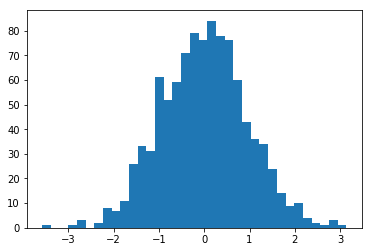

In [4]:
_ = plt.hist(x,35)
plt.show()


# Формуємо емпіричну функцію розподілу

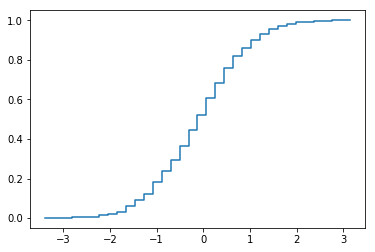

In [5]:
# сортуємо вибріку
data = np.sort(x)

num_bins = 35

# Use the histogram function to bin the data
counts, bin_edges = np.histogram(data, bins=num_bins)

# Now find the cdf
ecdf = np.cumsum(counts)
ecdf = ecdf/ecdf[-1]
# And finally plot the cdf
plt.step(bin_edges[1:], ecdf)

plt.show()


## Рахуємо теоретичну функцію розподілу


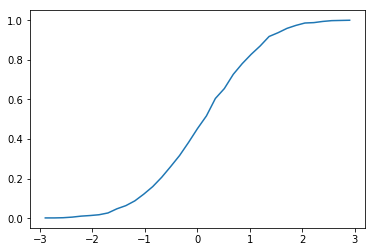

mean is 0.024478076263916064
std is 0.986803315696748


In [6]:
mean = np.mean(x)
std =  np.std(x)

t = np.random.normal(mean, std, 1000)
data = np.sort(t)
num_bins = 35

# Use the histogram function to bin the data
counts, bin_edges = np.histogram(data, bins=num_bins)

# Now find the cdf
cdf = np.cumsum(counts)
cdf = cdf/cdf[-1]
# And finally plot the cdfb
plt.plot(bin_edges[1:], cdf)

plt.show()
print('mean is {}'.format(mean))
print('std is {}'.format(std))


# Рахуємо критичні значення  D для рівня значущості альфа

In [7]:
alpha = 0.05
critical_val = np.math.sqrt((-1/2) * np.log(alpha/2))/ np.math.sqrt(35) 
print('критичне значення = {}'.format(critical_val))


критичне значення = 0.2295610548762864


#  Використаємо вбудовану функцію для решти роботи

In [8]:
stats.ks_2samp( cdf,ecdf)

Ks_2sampResult(statistic=0.085714285714285743, pvalue=0.99913063917515277)

# Тепер перевіримо для справжньої вибірки

In [600]:
import pandas as pd

df = pd.read_csv('forestfires.csv')

df = df['temp']

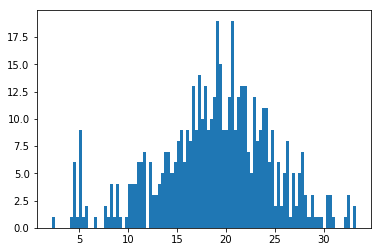

In [620]:
_ = plt.hist(df,100)
plt.show()

## Отже нашою гіпотезою $H_0$ буде  що температура лісової пожежі нормально розподілена

In [604]:
mean = np.mean(df)
std = np.std(df)
print(' Параметри розподілу а =  {}, var ={}'.format(mean, std))

 Параметри розподілу а =  18.88916827852998, var =5.8010069395983646


## Згенеруємо нормально розподілену вибірку з такими ж параметрами і проведемо тест Колмогорова-Смирнова для порівння цих двох вибірок

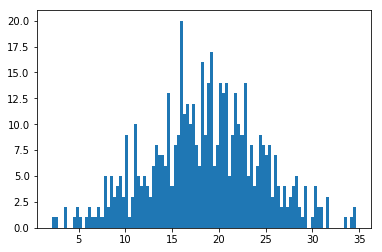

Значення D = 0.07543520309477758


In [626]:
test = np.random.normal(mean, std, len(df))
_ = plt.hist(test,100)
plt.show()

D, p_val = stats.ks_2samp(df,test)
print('Значення D = {}'.format(D))

In [624]:
alpha = 0.1    print('Нульову гіпотезу приймаємо')

critical_val = np.math.sqrt((-1/2) * np.log(alpha/2))/ np.math.sqrt(len(df)) 
print('критичне значення = {}'.format(critical_val))

критичне значення = 0.05382589126218227


In [627]:
if D < critical_val:
    print('Нульову гіпотезу приймаємо')
else:
    print('Нульову гіпотезу не приймаємо')


Нульову гіпотезу не приймаємо
